In [1]:
import torch
import torch.nn as nn
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np

In [2]:
training_data = datasets.ImageFolder(root='./tiny-224/train', transform=ToTensor())
test_data = datasets.ImageFolder(root='./tiny-224/val', transform=ToTensor())

training_dataloader = DataLoader(training_data, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=4, shuffle=True)

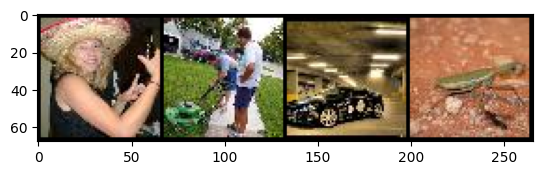

In [3]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# Get some random training images.
dataiter = iter(training_dataloader)
images, labels = next(dataiter)
# Show images.
imshow(torchvision.utils.make_grid(images))

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  

cuda:0


In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.net = nn.Sequential(
#             3x3 Conv, 3x32x32 - in, 10x32x32 - out
            nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=1),
#             Relu, 10x32x32 - in, 10x32x32 - out
            nn.ReLU(),
#             2x2 AvgPool, 10x32x32 - in, 10x16x16 - out
            nn.MaxPool2d(kernel_size=2, stride=2),
#             3x3 Conv, 10x16x16 - in, 20x16x16 - out
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, stride=1, padding=1),
#             ReLU, 20x16x16 - in, 20x16x16 - out
            nn.ReLU(),
#             2x2 AvgPool, 20x16x16 - in, 20x8x8 - out
            nn.MaxPool2d(kernel_size=2, stride=2),
#             3x3 Conv, 10x16x16 - in, 20x16x16 - out
            nn.Conv2d(in_channels=20, out_channels=40, kernel_size=3, stride=1, padding=1),
#             ReLU, 20x16x16 - in, 20x16x16 - out
            nn.ReLU(),
#             2x2 AvgPool, 20x16x16 - in, 20x8x8 - out
            nn.MaxPool2d(kernel_size=2, stride=2),
#             Flatten, 20x8x8 - in, 1280 - out
            nn.Flatten(),
#             Linear, 1280 - in, 100 - out
            nn.Linear(in_features=2560, out_features=1280),
#             Relu, 100 - in, 100 - out
            nn.ReLU(),
#             Linear, 100 - in, 10 - out
            nn.Linear(in_features=1280, out_features=200)
        )
        
        
        
        
    def forward(self, x):
        return self.net(x)

net = Net()     # Create the network instance.
net.to(device)  # Move the network parameters to the specified device.

Net(
  (net): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
    (10): Linear(in_features=2560, out_features=1280, bias=True)
    (11): ReLU()
    (12): Linear(in_features=1280, out_features=200, bias=True)
  )
)

In [10]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) 

In [11]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(training_dataloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 5.299
[epoch: 0, i:   199] avg mini-batch loss: 5.299
[epoch: 0, i:   299] avg mini-batch loss: 5.295
[epoch: 0, i:   399] avg mini-batch loss: 5.302
[epoch: 0, i:   499] avg mini-batch loss: 5.294
[epoch: 0, i:   599] avg mini-batch loss: 5.291
[epoch: 0, i:   699] avg mini-batch loss: 5.300
[epoch: 0, i:   799] avg mini-batch loss: 5.298
[epoch: 0, i:   899] avg mini-batch loss: 5.300
[epoch: 0, i:   999] avg mini-batch loss: 5.293
[epoch: 0, i:  1099] avg mini-batch loss: 5.296
[epoch: 0, i:  1199] avg mini-batch loss: 5.293
[epoch: 0, i:  1299] avg mini-batch loss: 5.296
[epoch: 0, i:  1399] avg mini-batch loss: 5.303
[epoch: 0, i:  1499] avg mini-batch loss: 5.300
[epoch: 0, i:  1599] avg mini-batch loss: 5.299
[epoch: 0, i:  1699] avg mini-batch loss: 5.300
[epoch: 0, i:  1799] avg mini-batch loss: 5.299
[epoch: 0, i:  1899] avg mini-batch loss: 5.301
[epoch: 0, i:  1999] avg mini-batch loss: 5.297
[epoch: 0, i:  2099] avg mini-batch loss

[epoch: 0, i: 17199] avg mini-batch loss: 4.827
[epoch: 0, i: 17299] avg mini-batch loss: 4.702
[epoch: 0, i: 17399] avg mini-batch loss: 4.848
[epoch: 0, i: 17499] avg mini-batch loss: 4.819
[epoch: 0, i: 17599] avg mini-batch loss: 4.785
[epoch: 0, i: 17699] avg mini-batch loss: 4.770
[epoch: 0, i: 17799] avg mini-batch loss: 4.764
[epoch: 0, i: 17899] avg mini-batch loss: 4.741
[epoch: 0, i: 17999] avg mini-batch loss: 4.731
[epoch: 0, i: 18099] avg mini-batch loss: 4.785
[epoch: 0, i: 18199] avg mini-batch loss: 4.828
[epoch: 0, i: 18299] avg mini-batch loss: 4.823
[epoch: 0, i: 18399] avg mini-batch loss: 4.753
[epoch: 0, i: 18499] avg mini-batch loss: 4.748
[epoch: 0, i: 18599] avg mini-batch loss: 4.634
[epoch: 0, i: 18699] avg mini-batch loss: 4.781
[epoch: 0, i: 18799] avg mini-batch loss: 4.792
[epoch: 0, i: 18899] avg mini-batch loss: 4.707
[epoch: 0, i: 18999] avg mini-batch loss: 4.712
[epoch: 0, i: 19099] avg mini-batch loss: 4.722
[epoch: 0, i: 19199] avg mini-batch loss

[epoch: 1, i:  9299] avg mini-batch loss: 4.113
[epoch: 1, i:  9399] avg mini-batch loss: 4.037
[epoch: 1, i:  9499] avg mini-batch loss: 4.102
[epoch: 1, i:  9599] avg mini-batch loss: 4.063
[epoch: 1, i:  9699] avg mini-batch loss: 4.171
[epoch: 1, i:  9799] avg mini-batch loss: 4.259
[epoch: 1, i:  9899] avg mini-batch loss: 4.200
[epoch: 1, i:  9999] avg mini-batch loss: 4.236
[epoch: 1, i: 10099] avg mini-batch loss: 4.012
[epoch: 1, i: 10199] avg mini-batch loss: 4.126
[epoch: 1, i: 10299] avg mini-batch loss: 4.042
[epoch: 1, i: 10399] avg mini-batch loss: 4.083
[epoch: 1, i: 10499] avg mini-batch loss: 4.097
[epoch: 1, i: 10599] avg mini-batch loss: 3.986
[epoch: 1, i: 10699] avg mini-batch loss: 4.175
[epoch: 1, i: 10799] avg mini-batch loss: 4.163
[epoch: 1, i: 10899] avg mini-batch loss: 3.922
[epoch: 1, i: 10999] avg mini-batch loss: 4.215
[epoch: 1, i: 11099] avg mini-batch loss: 4.066
[epoch: 1, i: 11199] avg mini-batch loss: 4.082
[epoch: 1, i: 11299] avg mini-batch loss

[epoch: 2, i:  1399] avg mini-batch loss: 3.774
[epoch: 2, i:  1499] avg mini-batch loss: 3.555
[epoch: 2, i:  1599] avg mini-batch loss: 3.632
[epoch: 2, i:  1699] avg mini-batch loss: 3.613
[epoch: 2, i:  1799] avg mini-batch loss: 3.640
[epoch: 2, i:  1899] avg mini-batch loss: 3.510
[epoch: 2, i:  1999] avg mini-batch loss: 3.586
[epoch: 2, i:  2099] avg mini-batch loss: 3.647
[epoch: 2, i:  2199] avg mini-batch loss: 3.653
[epoch: 2, i:  2299] avg mini-batch loss: 3.683
[epoch: 2, i:  2399] avg mini-batch loss: 3.581
[epoch: 2, i:  2499] avg mini-batch loss: 3.592
[epoch: 2, i:  2599] avg mini-batch loss: 3.616
[epoch: 2, i:  2699] avg mini-batch loss: 3.569
[epoch: 2, i:  2799] avg mini-batch loss: 3.726
[epoch: 2, i:  2899] avg mini-batch loss: 3.691
[epoch: 2, i:  2999] avg mini-batch loss: 3.682
[epoch: 2, i:  3099] avg mini-batch loss: 3.664
[epoch: 2, i:  3199] avg mini-batch loss: 3.676
[epoch: 2, i:  3299] avg mini-batch loss: 3.653
[epoch: 2, i:  3399] avg mini-batch loss

[epoch: 2, i: 18499] avg mini-batch loss: 3.576
[epoch: 2, i: 18599] avg mini-batch loss: 3.296
[epoch: 2, i: 18699] avg mini-batch loss: 3.733
[epoch: 2, i: 18799] avg mini-batch loss: 3.616
[epoch: 2, i: 18899] avg mini-batch loss: 3.614
[epoch: 2, i: 18999] avg mini-batch loss: 3.575
[epoch: 2, i: 19099] avg mini-batch loss: 3.466
[epoch: 2, i: 19199] avg mini-batch loss: 3.448
[epoch: 2, i: 19299] avg mini-batch loss: 3.492
[epoch: 2, i: 19399] avg mini-batch loss: 3.456
[epoch: 2, i: 19499] avg mini-batch loss: 3.557
[epoch: 2, i: 19599] avg mini-batch loss: 3.612
[epoch: 2, i: 19699] avg mini-batch loss: 3.447
[epoch: 2, i: 19799] avg mini-batch loss: 3.526
[epoch: 2, i: 19899] avg mini-batch loss: 3.519
[epoch: 2, i: 19999] avg mini-batch loss: 3.513
[epoch: 2, i: 20099] avg mini-batch loss: 3.563
[epoch: 2, i: 20199] avg mini-batch loss: 3.550
[epoch: 2, i: 20299] avg mini-batch loss: 3.682
[epoch: 2, i: 20399] avg mini-batch loss: 3.542
[epoch: 2, i: 20499] avg mini-batch loss

[epoch: 3, i: 10599] avg mini-batch loss: 3.146
[epoch: 3, i: 10699] avg mini-batch loss: 3.180
[epoch: 3, i: 10799] avg mini-batch loss: 3.214
[epoch: 3, i: 10899] avg mini-batch loss: 3.170
[epoch: 3, i: 10999] avg mini-batch loss: 3.307
[epoch: 3, i: 11099] avg mini-batch loss: 3.164
[epoch: 3, i: 11199] avg mini-batch loss: 3.137
[epoch: 3, i: 11299] avg mini-batch loss: 3.056
[epoch: 3, i: 11399] avg mini-batch loss: 3.155
[epoch: 3, i: 11499] avg mini-batch loss: 3.415
[epoch: 3, i: 11599] avg mini-batch loss: 3.149
[epoch: 3, i: 11699] avg mini-batch loss: 3.180
[epoch: 3, i: 11799] avg mini-batch loss: 3.025
[epoch: 3, i: 11899] avg mini-batch loss: 3.274
[epoch: 3, i: 11999] avg mini-batch loss: 3.167
[epoch: 3, i: 12099] avg mini-batch loss: 3.264
[epoch: 3, i: 12199] avg mini-batch loss: 3.142
[epoch: 3, i: 12299] avg mini-batch loss: 3.327
[epoch: 3, i: 12399] avg mini-batch loss: 3.315
[epoch: 3, i: 12499] avg mini-batch loss: 3.185
[epoch: 3, i: 12599] avg mini-batch loss

[epoch: 4, i:  2699] avg mini-batch loss: 2.530
[epoch: 4, i:  2799] avg mini-batch loss: 2.483
[epoch: 4, i:  2899] avg mini-batch loss: 2.535
[epoch: 4, i:  2999] avg mini-batch loss: 2.488
[epoch: 4, i:  3099] avg mini-batch loss: 2.536
[epoch: 4, i:  3199] avg mini-batch loss: 2.658
[epoch: 4, i:  3299] avg mini-batch loss: 2.416
[epoch: 4, i:  3399] avg mini-batch loss: 2.605
[epoch: 4, i:  3499] avg mini-batch loss: 2.760
[epoch: 4, i:  3599] avg mini-batch loss: 2.730
[epoch: 4, i:  3699] avg mini-batch loss: 2.603
[epoch: 4, i:  3799] avg mini-batch loss: 2.665
[epoch: 4, i:  3899] avg mini-batch loss: 2.577
[epoch: 4, i:  3999] avg mini-batch loss: 2.781
[epoch: 4, i:  4099] avg mini-batch loss: 2.506
[epoch: 4, i:  4199] avg mini-batch loss: 2.703
[epoch: 4, i:  4299] avg mini-batch loss: 2.615
[epoch: 4, i:  4399] avg mini-batch loss: 2.543
[epoch: 4, i:  4499] avg mini-batch loss: 2.723
[epoch: 4, i:  4599] avg mini-batch loss: 2.426
[epoch: 4, i:  4699] avg mini-batch loss

[epoch: 4, i: 19799] avg mini-batch loss: 2.936
[epoch: 4, i: 19899] avg mini-batch loss: 3.064
[epoch: 4, i: 19999] avg mini-batch loss: 2.830
[epoch: 4, i: 20099] avg mini-batch loss: 2.824
[epoch: 4, i: 20199] avg mini-batch loss: 2.709
[epoch: 4, i: 20299] avg mini-batch loss: 2.789
[epoch: 4, i: 20399] avg mini-batch loss: 3.093
[epoch: 4, i: 20499] avg mini-batch loss: 2.905
[epoch: 4, i: 20599] avg mini-batch loss: 2.805
[epoch: 4, i: 20699] avg mini-batch loss: 2.987
[epoch: 4, i: 20799] avg mini-batch loss: 2.812
[epoch: 4, i: 20899] avg mini-batch loss: 2.948
[epoch: 4, i: 20999] avg mini-batch loss: 2.935
[epoch: 4, i: 21099] avg mini-batch loss: 2.831
[epoch: 4, i: 21199] avg mini-batch loss: 2.976
[epoch: 4, i: 21299] avg mini-batch loss: 2.932
[epoch: 4, i: 21399] avg mini-batch loss: 2.898
[epoch: 4, i: 21499] avg mini-batch loss: 3.036
[epoch: 4, i: 21599] avg mini-batch loss: 2.884
[epoch: 4, i: 21699] avg mini-batch loss: 2.550
[epoch: 4, i: 21799] avg mini-batch loss

[epoch: 5, i: 11899] avg mini-batch loss: 2.551
[epoch: 5, i: 11999] avg mini-batch loss: 2.316
[epoch: 5, i: 12099] avg mini-batch loss: 2.176
[epoch: 5, i: 12199] avg mini-batch loss: 2.225
[epoch: 5, i: 12299] avg mini-batch loss: 2.333
[epoch: 5, i: 12399] avg mini-batch loss: 2.353
[epoch: 5, i: 12499] avg mini-batch loss: 2.398
[epoch: 5, i: 12599] avg mini-batch loss: 2.240
[epoch: 5, i: 12699] avg mini-batch loss: 2.263
[epoch: 5, i: 12799] avg mini-batch loss: 2.153
[epoch: 5, i: 12899] avg mini-batch loss: 2.361
[epoch: 5, i: 12999] avg mini-batch loss: 2.201
[epoch: 5, i: 13099] avg mini-batch loss: 2.195
[epoch: 5, i: 13199] avg mini-batch loss: 2.373
[epoch: 5, i: 13299] avg mini-batch loss: 2.355
[epoch: 5, i: 13399] avg mini-batch loss: 2.121
[epoch: 5, i: 13499] avg mini-batch loss: 2.318
[epoch: 5, i: 13599] avg mini-batch loss: 2.511
[epoch: 5, i: 13699] avg mini-batch loss: 2.620
[epoch: 5, i: 13799] avg mini-batch loss: 2.324
[epoch: 5, i: 13899] avg mini-batch loss

[epoch: 6, i:  3999] avg mini-batch loss: 1.388
[epoch: 6, i:  4099] avg mini-batch loss: 1.499
[epoch: 6, i:  4199] avg mini-batch loss: 1.355
[epoch: 6, i:  4299] avg mini-batch loss: 1.324
[epoch: 6, i:  4399] avg mini-batch loss: 1.463
[epoch: 6, i:  4499] avg mini-batch loss: 1.315
[epoch: 6, i:  4599] avg mini-batch loss: 1.336
[epoch: 6, i:  4699] avg mini-batch loss: 1.519
[epoch: 6, i:  4799] avg mini-batch loss: 1.442
[epoch: 6, i:  4899] avg mini-batch loss: 1.409
[epoch: 6, i:  4999] avg mini-batch loss: 1.269
[epoch: 6, i:  5099] avg mini-batch loss: 1.352
[epoch: 6, i:  5199] avg mini-batch loss: 1.630
[epoch: 6, i:  5299] avg mini-batch loss: 1.459
[epoch: 6, i:  5399] avg mini-batch loss: 1.272
[epoch: 6, i:  5499] avg mini-batch loss: 1.643
[epoch: 6, i:  5599] avg mini-batch loss: 1.526
[epoch: 6, i:  5699] avg mini-batch loss: 1.456
[epoch: 6, i:  5799] avg mini-batch loss: 1.529
[epoch: 6, i:  5899] avg mini-batch loss: 1.454
[epoch: 6, i:  5999] avg mini-batch loss

[epoch: 6, i: 21099] avg mini-batch loss: 1.824
[epoch: 6, i: 21199] avg mini-batch loss: 1.815
[epoch: 6, i: 21299] avg mini-batch loss: 2.034
[epoch: 6, i: 21399] avg mini-batch loss: 2.109
[epoch: 6, i: 21499] avg mini-batch loss: 2.175
[epoch: 6, i: 21599] avg mini-batch loss: 2.009
[epoch: 6, i: 21699] avg mini-batch loss: 2.047
[epoch: 6, i: 21799] avg mini-batch loss: 1.956
[epoch: 6, i: 21899] avg mini-batch loss: 2.097
[epoch: 6, i: 21999] avg mini-batch loss: 1.933
[epoch: 6, i: 22099] avg mini-batch loss: 2.101
[epoch: 6, i: 22199] avg mini-batch loss: 1.949
[epoch: 6, i: 22299] avg mini-batch loss: 1.898
[epoch: 6, i: 22399] avg mini-batch loss: 1.916
[epoch: 6, i: 22499] avg mini-batch loss: 1.942
[epoch: 6, i: 22599] avg mini-batch loss: 1.927
[epoch: 6, i: 22699] avg mini-batch loss: 2.049
[epoch: 6, i: 22799] avg mini-batch loss: 1.968
[epoch: 6, i: 22899] avg mini-batch loss: 2.279
[epoch: 6, i: 22999] avg mini-batch loss: 1.966
[epoch: 6, i: 23099] avg mini-batch loss

[epoch: 7, i: 13199] avg mini-batch loss: 1.419
[epoch: 7, i: 13299] avg mini-batch loss: 1.490
[epoch: 7, i: 13399] avg mini-batch loss: 1.393
[epoch: 7, i: 13499] avg mini-batch loss: 1.256
[epoch: 7, i: 13599] avg mini-batch loss: 1.454
[epoch: 7, i: 13699] avg mini-batch loss: 1.469
[epoch: 7, i: 13799] avg mini-batch loss: 1.424
[epoch: 7, i: 13899] avg mini-batch loss: 1.439
[epoch: 7, i: 13999] avg mini-batch loss: 1.247
[epoch: 7, i: 14099] avg mini-batch loss: 1.436
[epoch: 7, i: 14199] avg mini-batch loss: 1.314
[epoch: 7, i: 14299] avg mini-batch loss: 1.329
[epoch: 7, i: 14399] avg mini-batch loss: 1.256
[epoch: 7, i: 14499] avg mini-batch loss: 1.329
[epoch: 7, i: 14599] avg mini-batch loss: 1.427
[epoch: 7, i: 14699] avg mini-batch loss: 1.328
[epoch: 7, i: 14799] avg mini-batch loss: 1.368
[epoch: 7, i: 14899] avg mini-batch loss: 1.285
[epoch: 7, i: 14999] avg mini-batch loss: 1.334
[epoch: 7, i: 15099] avg mini-batch loss: 1.507
[epoch: 7, i: 15199] avg mini-batch loss

[epoch: 8, i:  5299] avg mini-batch loss: 0.815
[epoch: 8, i:  5399] avg mini-batch loss: 0.785
[epoch: 8, i:  5499] avg mini-batch loss: 0.760
[epoch: 8, i:  5599] avg mini-batch loss: 0.677
[epoch: 8, i:  5699] avg mini-batch loss: 0.851
[epoch: 8, i:  5799] avg mini-batch loss: 0.767
[epoch: 8, i:  5899] avg mini-batch loss: 0.653
[epoch: 8, i:  5999] avg mini-batch loss: 0.876
[epoch: 8, i:  6099] avg mini-batch loss: 0.887
[epoch: 8, i:  6199] avg mini-batch loss: 0.849
[epoch: 8, i:  6299] avg mini-batch loss: 0.933
[epoch: 8, i:  6399] avg mini-batch loss: 0.809
[epoch: 8, i:  6499] avg mini-batch loss: 0.905
[epoch: 8, i:  6599] avg mini-batch loss: 0.901
[epoch: 8, i:  6699] avg mini-batch loss: 0.770
[epoch: 8, i:  6799] avg mini-batch loss: 0.808
[epoch: 8, i:  6899] avg mini-batch loss: 0.812
[epoch: 8, i:  6999] avg mini-batch loss: 0.891
[epoch: 8, i:  7099] avg mini-batch loss: 0.780
[epoch: 8, i:  7199] avg mini-batch loss: 0.860
[epoch: 8, i:  7299] avg mini-batch loss

[epoch: 8, i: 22399] avg mini-batch loss: 1.580
[epoch: 8, i: 22499] avg mini-batch loss: 1.424
[epoch: 8, i: 22599] avg mini-batch loss: 1.365
[epoch: 8, i: 22699] avg mini-batch loss: 1.319
[epoch: 8, i: 22799] avg mini-batch loss: 1.596
[epoch: 8, i: 22899] avg mini-batch loss: 1.213
[epoch: 8, i: 22999] avg mini-batch loss: 1.262
[epoch: 8, i: 23099] avg mini-batch loss: 1.186
[epoch: 8, i: 23199] avg mini-batch loss: 1.386
[epoch: 8, i: 23299] avg mini-batch loss: 1.429
[epoch: 8, i: 23399] avg mini-batch loss: 1.472
[epoch: 8, i: 23499] avg mini-batch loss: 1.366
[epoch: 8, i: 23599] avg mini-batch loss: 1.322
[epoch: 8, i: 23699] avg mini-batch loss: 1.356
[epoch: 8, i: 23799] avg mini-batch loss: 1.330
[epoch: 8, i: 23899] avg mini-batch loss: 1.394
[epoch: 8, i: 23999] avg mini-batch loss: 1.458
[epoch: 8, i: 24099] avg mini-batch loss: 1.312
[epoch: 8, i: 24199] avg mini-batch loss: 1.493
[epoch: 8, i: 24299] avg mini-batch loss: 1.339
[epoch: 8, i: 24399] avg mini-batch loss

[epoch: 9, i: 14499] avg mini-batch loss: 1.088
[epoch: 9, i: 14599] avg mini-batch loss: 1.028
[epoch: 9, i: 14699] avg mini-batch loss: 1.093
[epoch: 9, i: 14799] avg mini-batch loss: 0.886
[epoch: 9, i: 14899] avg mini-batch loss: 1.027
[epoch: 9, i: 14999] avg mini-batch loss: 1.027
[epoch: 9, i: 15099] avg mini-batch loss: 1.054
[epoch: 9, i: 15199] avg mini-batch loss: 1.017
[epoch: 9, i: 15299] avg mini-batch loss: 0.936
[epoch: 9, i: 15399] avg mini-batch loss: 1.068
[epoch: 9, i: 15499] avg mini-batch loss: 1.082
[epoch: 9, i: 15599] avg mini-batch loss: 0.899
[epoch: 9, i: 15699] avg mini-batch loss: 0.996
[epoch: 9, i: 15799] avg mini-batch loss: 1.085
[epoch: 9, i: 15899] avg mini-batch loss: 0.982
[epoch: 9, i: 15999] avg mini-batch loss: 0.984
[epoch: 9, i: 16099] avg mini-batch loss: 0.947
[epoch: 9, i: 16199] avg mini-batch loss: 1.317
[epoch: 9, i: 16299] avg mini-batch loss: 0.892
[epoch: 9, i: 16399] avg mini-batch loss: 0.842
[epoch: 9, i: 16499] avg mini-batch loss

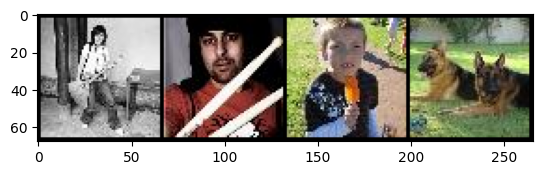

NameError: name 'classes' is not defined

In [12]:
# Check several images.
dataiter = iter(test_dataloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [18]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        print(correct)
        print(total)

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

0
4
0
8
0
12
0
16
0
20
0
24
0
28
0
32
0
36
0
40
0
44
0
48
0
52
0
56
0
60
0
64
0
68
0
72
0
76
0
80
0
84
0
88
1
92
1
96
1
100
1
104
1
108
1
112
2
116
2
120
2
124
2
128
2
132
2
136
2
140
2
144
2
148
2
152
2
156
2
160
2
164
2
168
2
172
2
176
2
180
2
184
2
188
2
192
2
196
2
200
2
204
2
208
2
212
2
216
2
220
2
224
2
228
2
232
2
236
2
240
2
244
2
248
2
252
2
256
2
260
2
264
2
268
2
272
2
276
2
280
2
284
2
288
2
292
2
296
2
300
2
304
2
308
2
312
2
316
2
320
2
324
2
328
2
332
2
336
2
340
2
344
2
348
2
352
2
356
2
360
2
364
2
368
2
372
2
376
2
380
2
384
2
388
2
392
2
396
2
400
2
404
2
408
2
412
2
416
2
420
2
424
2
428
2
432
2
436
2
440
2
444
2
448
2
452
2
456
2
460
2
464
2
468
2
472
2
476
2
480
2
484
2
488
2
492
2
496
2
500
2
504
2
508
2
512
2
516
2
520
2
524
2
528
2
532
2
536
2
540
2
544
2
548
2
552
2
556
2
560
2
564
2
568
2
572
2
576
2
580
2
584
2
588
2
592
2
596
2
600
2
604
2
608
2
612
2
616
2
620
2
624
2
628
2
632
2
636
2
640
2
644
2
648
2
652
2
656
2
660
2
664
2
668
2
672
2
676
2
680
2
684


22
4744
22
4748
22
4752
22
4756
22
4760
22
4764
22
4768
22
4772
22
4776
22
4780
22
4784
22
4788
22
4792
22
4796
22
4800
22
4804
22
4808
22
4812
23
4816
23
4820
23
4824
23
4828
23
4832
23
4836
23
4840
23
4844
23
4848
23
4852
23
4856
23
4860
23
4864
23
4868
23
4872
23
4876
23
4880
23
4884
24
4888
24
4892
24
4896
24
4900
24
4904
24
4908
24
4912
24
4916
24
4920
24
4924
24
4928
24
4932
25
4936
25
4940
25
4944
25
4948
25
4952
25
4956
25
4960
25
4964
25
4968
25
4972
25
4976
25
4980
25
4984
25
4988
25
4992
25
4996
25
5000
25
5004
25
5008
25
5012
25
5016
25
5020
26
5024
26
5028
26
5032
26
5036
26
5040
26
5044
26
5048
26
5052
26
5056
26
5060
26
5064
26
5068
26
5072
26
5076
26
5080
26
5084
26
5088
26
5092
26
5096
26
5100
26
5104
26
5108
26
5112
26
5116
26
5120
26
5124
26
5128
26
5132
26
5136
26
5140
26
5144
26
5148
26
5152
26
5156
27
5160
27
5164
27
5168
27
5172
27
5176
27
5180
27
5184
27
5188
27
5192
27
5196
27
5200
27
5204
27
5208
27
5212
27
5216
27
5220
27
5224
27
5228
27
5232
27
5236
27
5240


38
8856
38
8860
38
8864
38
8868
38
8872
38
8876
38
8880
38
8884
38
8888
38
8892
38
8896
38
8900
38
8904
38
8908
38
8912
38
8916
39
8920
39
8924
39
8928
39
8932
39
8936
39
8940
39
8944
39
8948
39
8952
39
8956
39
8960
39
8964
39
8968
39
8972
39
8976
39
8980
39
8984
39
8988
39
8992
39
8996
39
9000
39
9004
40
9008
40
9012
40
9016
40
9020
40
9024
40
9028
40
9032
40
9036
40
9040
40
9044
40
9048
40
9052
40
9056
40
9060
40
9064
40
9068
40
9072
40
9076
40
9080
40
9084
40
9088
40
9092
40
9096
41
9100
41
9104
41
9108
41
9112
41
9116
41
9120
41
9124
41
9128
41
9132
41
9136
41
9140
41
9144
41
9148
41
9152
41
9156
41
9160
41
9164
41
9168
41
9172
41
9176
41
9180
41
9184
41
9188
41
9192
41
9196
41
9200
41
9204
41
9208
41
9212
41
9216
41
9220
41
9224
41
9228
41
9232
41
9236
41
9240
41
9244
41
9248
41
9252
42
9256
42
9260
42
9264
42
9268
42
9272
42
9276
42
9280
42
9284
42
9288
42
9292
42
9296
42
9300
42
9304
42
9308
42
9312
42
9316
42
9320
42
9324
42
9328
42
9332
42
9336
42
9340
42
9344
42
9348
42
9352


In [15]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

# for i in range(10):
#     print('Accuracy of %5s : %2d %%' % (
#         classes[i], 100 * class_correct[i] / class_total[i]))

NameError: name 'testloader' is not defined